In [77]:
import sys
import os
import SimpleITK
import numpy
import matplotlib.pyplot
import subprocess
import json
import config
import getData
import segmentation
import importlib
importlib.reload(segmentation)
importlib.reload(getData)
importlib.reload(config)

sys.path.append(os.path.join(os.path.expanduser('~'),'software','src','nixSuite','wrapper'))
import nixWrapper
nixWrapper.loadLibrary('labkeyInterface')
import labkeyInterface
import labkeyFileBrowser
import labkeyDatabaseBrowser

#manipulate segmentations
#rewrite this
#nim=getPatientNIM(pId)



loadLibrary
remoteSourcesURL https://git0.fmf.uni-lj.si/studen/nixSuite/raw/master/remoteResources/resources.json
{'labkeyInterface': {'url': 'https://git0.fmf.uni-lj.si/studen/labkeyInterface/archive/master.zip', 'branch': 'master', 'modules': []}, 'irAEMM': {'url': 'https://git0.fmf.uni-lj.si/studen/iraemm/archive/master.zip', 'branch': 'master', 'modules': ['iraemmBrowser']}, 'SlicerLabkeyExtension': {'url': 'https://git0.fmf.uni-lj.si/studen/SlicerLabkeyExtension/archive/SlicerExtensionIndex.zip', 'branch': 'SlicerExtensionIndex', 'modules': ['labkeyBrowser']}, 'limfomiPET': {'url': 'https://git0.fmf.uni-lj.si/studen/limfomiPET/archive/master.zip', 'branch': 'master', 'modules': ['imageBrowser', 'segmentationBrowser']}, 'parseConfig': {'url': 'https://git0.fmf.uni-lj.si/studen/parseConfig/archive/master.zip', 'branch': 'master', 'modules': []}, 'orthancInterface': {'url': 'https://git0.fmf.uni-lj.si/studen/orthancInterface/archive/master.zip', 'branch': 'master', 'modules': []}}
{'

In [33]:
#

fsetup='../template/cardiacSPECT.json'
with open(fsetup,'r') as f:
    setup=json.load(f)

db,fb=getData.connectDB(setup['network'])    
    


loadLibrary
remoteSourcesURL https://git0.fmf.uni-lj.si/studen/nixSuite/raw/master/remoteResources/resources.json
{'labkeyInterface': {'url': 'https://git0.fmf.uni-lj.si/studen/labkeyInterface/archive/master.zip', 'branch': 'master', 'modules': []}, 'irAEMM': {'url': 'https://git0.fmf.uni-lj.si/studen/iraemm/archive/master.zip', 'branch': 'master', 'modules': ['iraemmBrowser']}, 'SlicerLabkeyExtension': {'url': 'https://git0.fmf.uni-lj.si/studen/SlicerLabkeyExtension/archive/SlicerExtensionIndex.zip', 'branch': 'SlicerExtensionIndex', 'modules': ['labkeyBrowser']}, 'limfomiPET': {'url': 'https://git0.fmf.uni-lj.si/studen/limfomiPET/archive/master.zip', 'branch': 'master', 'modules': ['imageBrowser', 'segmentationBrowser']}, 'parseConfig': {'url': 'https://git0.fmf.uni-lj.si/studen/parseConfig/archive/master.zip', 'branch': 'master', 'modules': []}, 'orthancInterface': {'url': 'https://git0.fmf.uni-lj.si/studen/orthancInterface/archive/master.zip', 'branch': 'master', 'modules': []}}
{'

User: andrej studen CSRF: 2409a3854c59397477514732952a6ed6


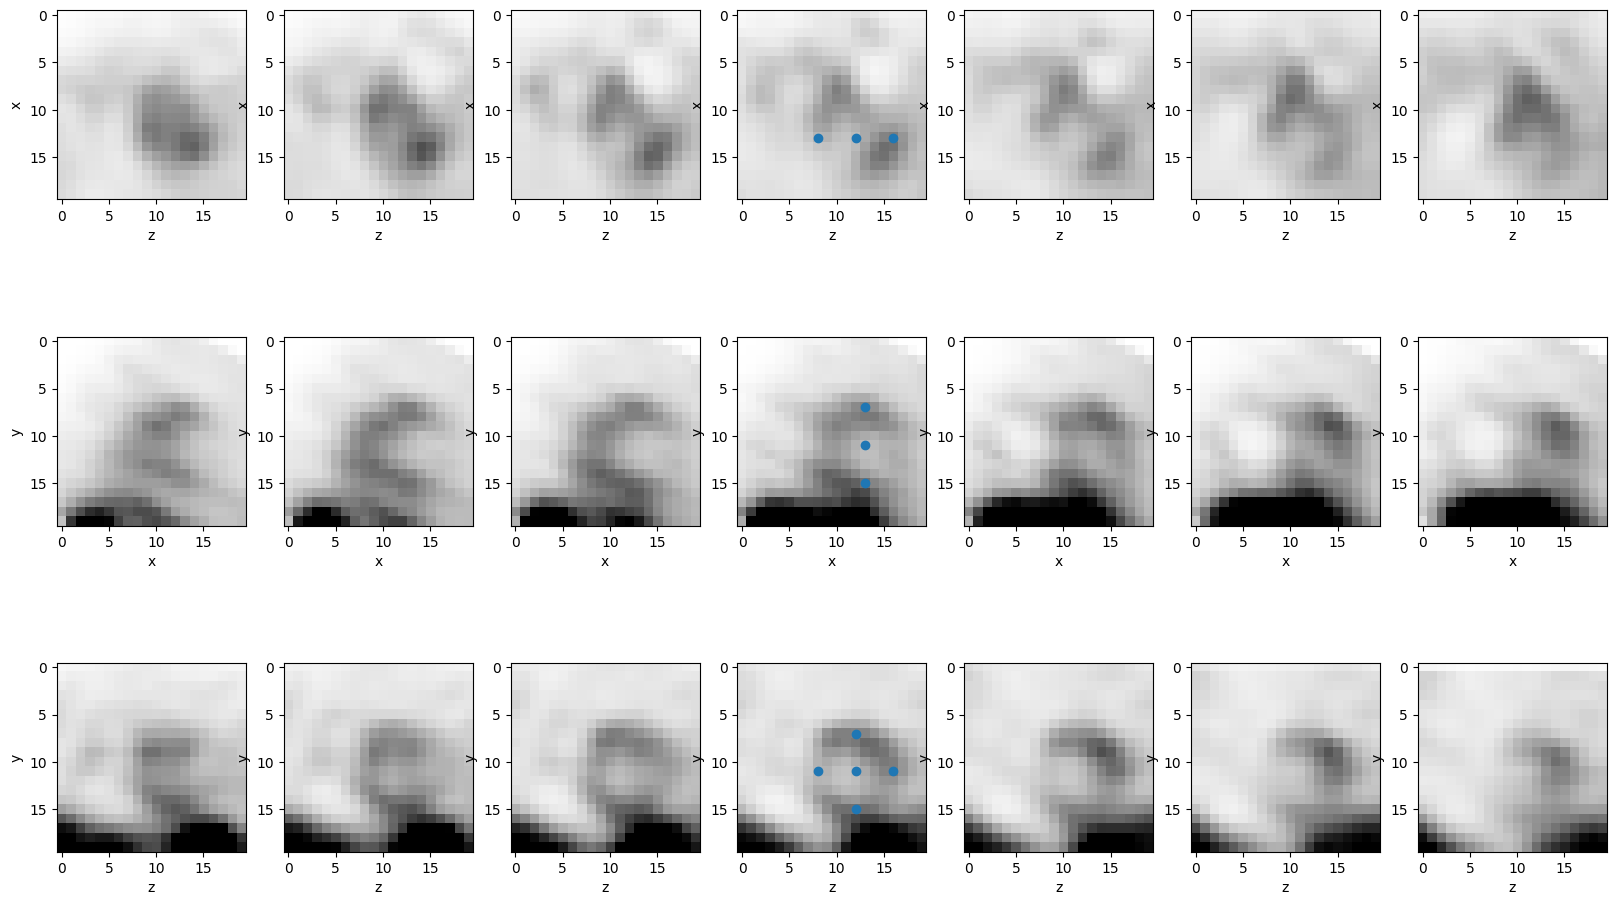

In [78]:
def guessSegmentation(db,setup,pId='MM',visitName='MIR',sx=-1,sy=-1,sz=-1):    
   idFilter={'variable':'PatientId','value':pId,'oper':'eq'}
   visitFilter={'variable':'visitName','value':visitName,'oper':'eq'}  
   rows=getData.getPatients(db,setup,[idFilter,visitFilter])
   r=rows[0] 
   pixels=segmentation.guessPixelPosition4(sx,sy,sz) 
   segmentation.updateSegmentation(db,setup,r,pixels)

#guessSegmentation(db,setup,sz=32,sx=33)
def doPlotSegmentation(db,fb,setup,pId='MM',visitName='MIR'):
   idFilter={'variable':'PatientId','value':pId,'oper':'eq'}
   visitFilter={'variable':'visitName','value':visitName,'oper':'eq'}  
   rows=getData.getPatients(db,setup,[idFilter,visitFilter])
   r=rows[0] 
   segmentation.plotSegmentation(db,fb,r,setup)

doPlotSegmentation(db,fb,setup)

In [ ]:
#rarely used. Mostly, segmentation points are edited in LabKey
rows=getData.getPatients(db,setup)
for r in rows:
    print('******{}******'.format(config.getCode(r,setup)))
    segmentation.writeSegmentation(db,r,setup)